<a href="https://colab.research.google.com/github/EddyGiusepe/Neural_Network_from_scratch_only_with_Python/blob/main/Rede_Neural_desde_zero_criando_CLASSES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Rede Neural desde zero estilo Framework de Deep Learning</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Este estudo está baseado nos tutoriais de [Pepe Cantoral, PhD](https://www.youtube.com/watch?v=_shpKyA89QQ&list=PLWzLQn_hxe6ZlC9-YMt3nN0Eo-ZpOJuXd&index=18).

Aqui estudaremos é implementaremos uma `REDE NEURAL Multi-capa` desde zero usando apenas `Python` e `NumPy`, sem usar Frameworks de Deep Learning como Tensorflow ou Pytorch.

# Rede Neural Multi-capa || OOP model

In [1]:
# Importamos nossas bibliotecas

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Importamos as nossas Imagens

In [2]:
# Importar MNIST
# Ver vídeo para aprender a importar estes Dados: https://www.youtube.com/watch?v=7cMKAlnSmpM

import gzip
import os
from os.path import isfile, join
def list_files(mnist_path):
    return [join(mnist_path,f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]

def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    
    return x_train, y_train, x_test, y_test   

In [3]:
# Aqui passamos o caminho: MNIST path
# Obviamente os Dados já foram baixados com antecedencia

mnist_path = '/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/1_Pytorch_Deep_Learning/Pytorch_examples/Rede_neural_exemplo_Pytorch/data/MNIST/raw/mnist_raw'

In [4]:
# Aqui utilizamos a função "get_images()" 

x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

In [5]:
# Nesta celula não NORMALIZAMOS como fizímos no script anterior

x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(np.float)
y_test = y_test_num.copy().reshape(10000, 1)

In [6]:
print("Os valores atuais da Média, Desvio padrão e o valor mínimo são, respectivamente:")
x_train.mean(), x_train.std(), x_train.min()

Os valores atuais da Média, Desvio padrão e o valor mínimo são, respectivamente:


(33.395157, 78.66619, 0.0)

In [7]:
# Aqui NORMALIZAMOS nossos Dados

def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std
    

In [8]:
# Aqui definimos a MÉDIA e o DESVIO PADRÃO
# Como estes objetos iremos NORMALIZAR nossos Dados de VALIDAÇÃO e Dados de TEST
x_mean = x_train.mean()
x_std = x_train.std()


# A lógica é a seguinte: Normalizamos com a estatística 
x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [9]:
# Aqui podemos verificar que a Média e o Desvio Padrão em nossos Dados
print("Média e desvio Padrão, respectivamente, em nossos Dados de TREINAMENTO")
print(x_train.mean(), x_train.std())

print("")

print("Média e desvio Padrão, respectivamente, em nossos Dados de VALIDAÇÃO")
print(x_val.mean(), x_val.std())


Média e desvio Padrão, respectivamente, em nossos Dados de TREINAMENTO
-3.1638146e-07 0.99999934

Média e desvio Padrão, respectivamente, em nossos Dados de VALIDAÇÃO
-0.0058509559841872305 0.9924333474151182


# Visualizando nossos Dados de Imagens

In [10]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    

La imagen muestreada representa un: 7


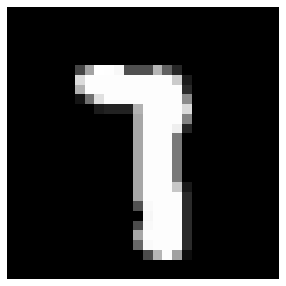

In [11]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx, 0]}')
plot_number(x_test_num[rnd_idx])

A seguir apresentamos as equações que usamos para construir nosso Modelo Neuronal:

$$z^1 = W^1 X  + b^1$$

$$a^1 = ReLU(z^1)$$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j e^{z_j}}$$

$$\mathcal{L}(\hat{y}^i, y^i) = - y^i ln(\hat{y}^i) = - ln(\hat{y}^i)$$

$$\mathcal{J}(w, b) = \frac{1}{num_samples} \sum_{i=1}^{num_samples}- ln(\hat{y}^i)$$

# Funções adicionais

## Mini-batches

Aqui construímos essa função que nos permitirá criar os `mini-batches` para fazer um treinamento em mini-batches. Isto consiste em enviar uma pequena seção de Dados (pequeno bloco de Dados) para fazer um treinamento mais eficiente, de que enviar um dado à vez.

In [12]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #amostras, 784
    y  #amostras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Erro na quantidade de amostras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]  
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

# Nossa classe Linear, ReLU e Sequential

In [13]:
# Serão objetos que vão heredar atributos de NumPy (Usar com cuidado!!!)

class np_tensor(np.ndarray): pass

## Classe Linear

In [14]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # Este é o foward da classe linear
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)    

# Classe ReLU

In [15]:
class ReLU():
    def __call__(self, Z): # ReLU recebe z = wx + b
        return np.maximum(0, Z)

    def backward(self, Z, A): # A saída de ReLU é: A
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

# Classe Sequential

In [16]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X 
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))  

# Função de Custo (ou Perda)

In [17]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()
    
    return preds, cost

# Loop de Treinamento

In [18]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [19]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [20]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 10)])

mb_size = 512
learning_rate = 1e-4
epochs = 20

In [21]:

train(model, epochs, mb_size, learning_rate)

costo: 0.35623432340012495, accuracy: 0.9165
costo: 0.15954799884024456, accuracy: 0.9344
costo: 0.20614744575150604, accuracy: 0.9448
costo: 0.18676819283935187, accuracy: 0.9507
costo: 0.1201501360896936, accuracy: 0.9539
costo: 0.15738641879276632, accuracy: 0.9578
costo: 0.12797190275422915, accuracy: 0.9623
costo: 0.15459350799042978, accuracy: 0.9635
costo: 0.1354549942400075, accuracy: 0.9645
costo: 0.09681969854077661, accuracy: 0.9657
costo: 0.0775099845601259, accuracy: 0.9678
costo: 0.12870073816181785, accuracy: 0.9698
costo: 0.08940924725230928, accuracy: 0.9682
costo: 0.0914506183960762, accuracy: 0.969
costo: 0.060300220902318194, accuracy: 0.9703
costo: 0.08032673129340226, accuracy: 0.9702
costo: 0.062409800210555234, accuracy: 0.9709
costo: 0.07304728209435828, accuracy: 0.9716
costo: 0.05096272143571268, accuracy: 0.9727
costo: 0.06191695867769552, accuracy: 0.9735


In [23]:

print(accuracy(x_test, y_test, mb_size))

0.9721


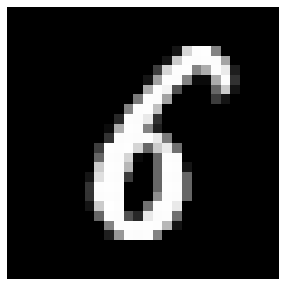

O valor predito é: 6, o valor real é:6


In [39]:

idx = np.random.randint(len(y_test))
plot_number(x_test_num[idx])
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'O valor predito é: {pred}, o valor real é:{y_test[idx][0]}')